In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 21:53:34 2015

@author: nymph
"""


#################################### Read the data ############################
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np

''' read_csv()
The read_csv() function in pandas package parse an csv data as a DataFrame data structure. What's the endpoint of the data?
The data structure is able to deal with complex table data whose attributes are of all data types. 
Row names, column names in the dataframe can be used to index data.
'''

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

################################## Enter your code below ######################

(406, 9)


In [2]:
import matplotlib.pyplot as plt

---
## 1.How many cars and how many attributes are in the data set?

In [3]:
data.car_name.duplicated().sum() #Đếm số tên xe trùng lắp

94

In [4]:
data.duplicated().sum() #Đếm số dòng trùng lắp

0

In [5]:
row, col = data.shape
print(row)
print(col)

406
9


---
## 2. How many distinct car companies are represented in the data set? What is the name of the car with the best MPG? What car company produced the most 8-cylinder cars? What are the names of 3-cylinder cars? Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

In [6]:
#Thêm cột `company` vào data
data['company'] = data.car_name.str.split(" ").str[0]
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,vw
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,dodge
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,ford


In [7]:
#Chỉnh các tên hãng chưa đúng hoặc trùng lắp
data['company'] = data['company'].str.replace('volkswagen','VW')
data['company'] = data['company'].str.replace('vokswagen','VW')
data['company'] = data['company'].str.replace('vw','VW')
data['company'] = data['company'].str.replace('maxda','mazda')
data['company'] = data['company'].str.replace('toyouta','toyota')
data['company'] = data['company'].str.replace('mercedes-benz','mercedes')
data['company'] = data['company'].str.replace('chevy','chevrolet')
data['company'] = data['company'].str.replace('chevroelt','chevrolet')
data['company'] = data['company'].str.replace('datsun','nissan')
data['company'] = data['company'].str.replace('capri','ford')

In [8]:
data.company.nunique() #Đếm số công ty xe hơi riêng biệt

29

In [9]:
data[data.mpg == data.mpg.max()].car_name #Xe có MPG tốt nhất

329    mazda glc
Name: car_name, dtype: object

In [10]:
data[data.cylinders == 8].company.value_counts() #Số lượng xe ô tô 8 xi lanh của từng hãng xe

ford          22
chevrolet     21
dodge         12
plymouth      11
amc            9
pontiac        7
buick          7
oldsmobile     7
mercury        5
chrysler       4
cadillac       2
hi             1
Name: company, dtype: int64

In [11]:
data[data.cylinders == 3].car_name #Tên các xe 3 xi lanh

78     mazda rx2 coupe
118          maxda rx3
250         mazda rx-4
341      mazda rx-7 gs
Name: car_name, dtype: object

---
## 3.What is the range, mean, and standard deviation of each attribute? Pay attention to potential missing values.

In [12]:
num_cols = data.select_dtypes(include = 'number').columns #Chọn ra các thuộc tính có dạng số

In [13]:
data[num_cols].describe() #range, mean, standard deviation của mỗi thuộc tính ứng với các giá trị (min, max), mean, std

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
#Tiềm năng giá trị bị thiếu
def missing_ratio(data):
    return (data.isna().mean() * 100).round(1)
data[num_cols].agg([missing_ratio])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
missing_ratio,2.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0


---
## 4.Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins. Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.


In [15]:
#Hàm tính số bins cho mỗi thuộc tính
def bin_s(x):
    q25, q75 = data[x].quantile([0.25,0.75])
    bin_width = 2*(q75 - q25)*len(data[x])**(-1/3)
    bins = round((data[x].max() - data[x].min())/bin_width)
    return bins

In [16]:
#Hàm vẽ biểu đồ histogram cho mỗi thuộc tính
def hist_plot(x):
    fig_obj = plt.figure(figsize=(10, 7.5))
    ax = plt.subplot(111)
    
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ''' Plot the histogram of '''
    temp = data[x]
    bins = bin_s(x)
    p = plt.hist(temp, bins = bins)
    plt.title(x.upper(), fontsize=14, fontweight='bold')
    
    plt.show()

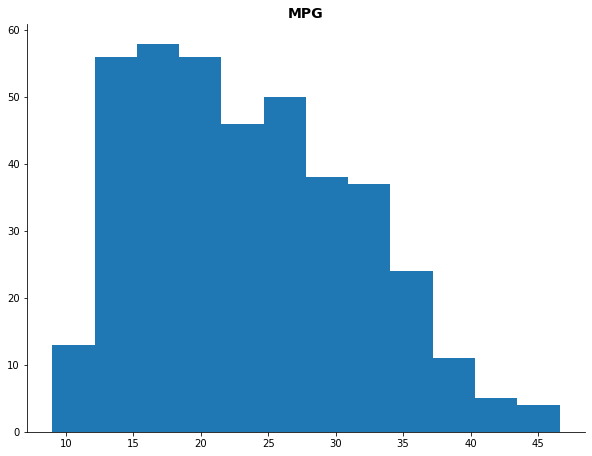

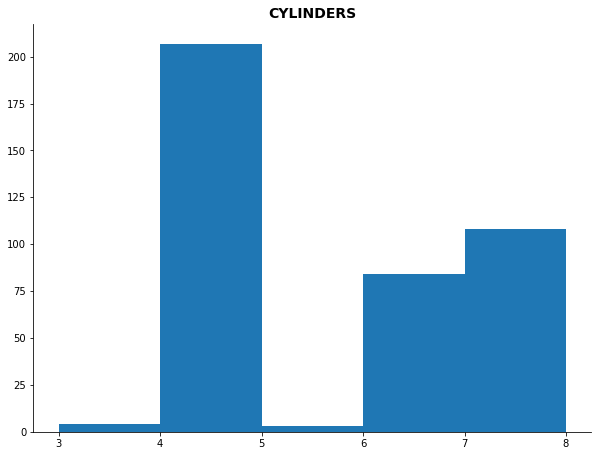

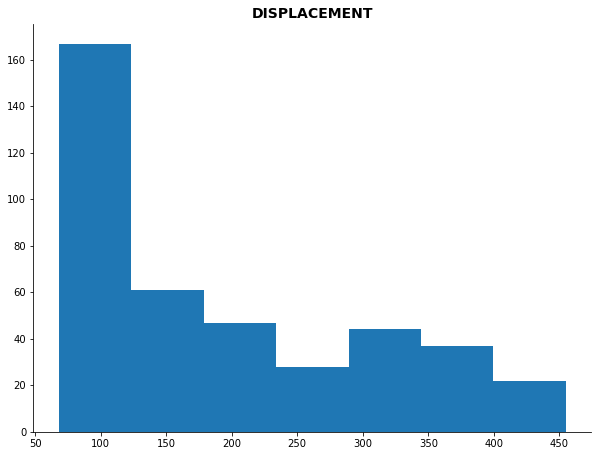

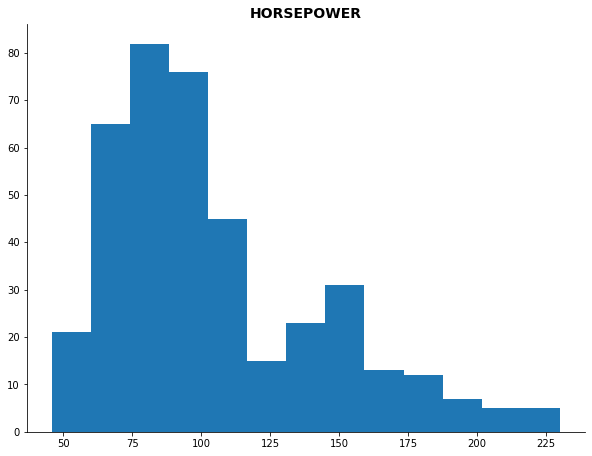

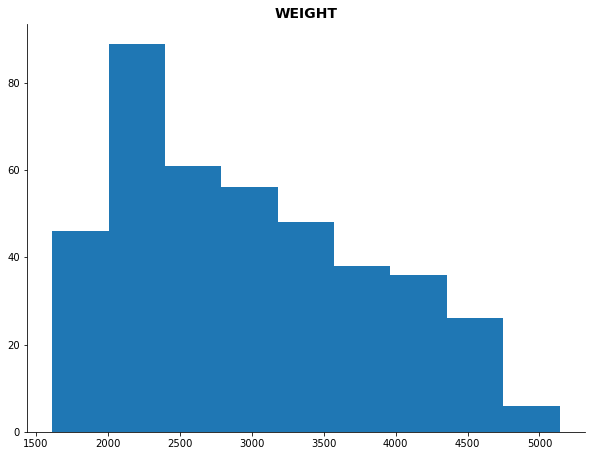

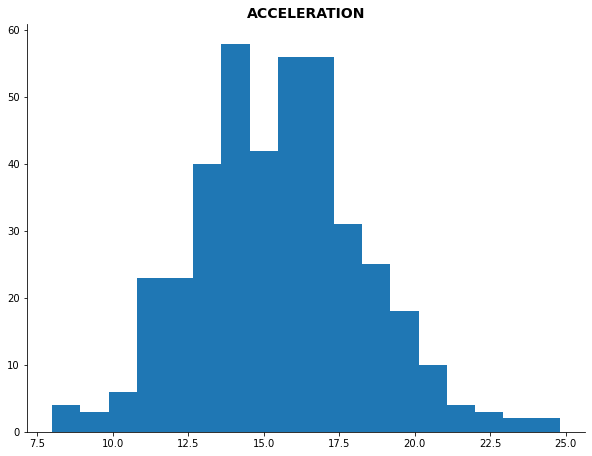

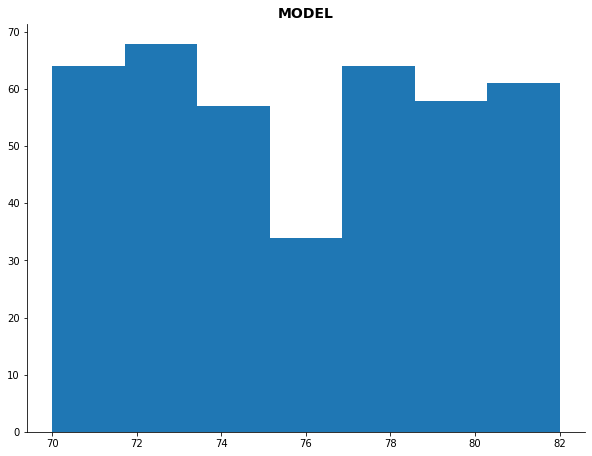

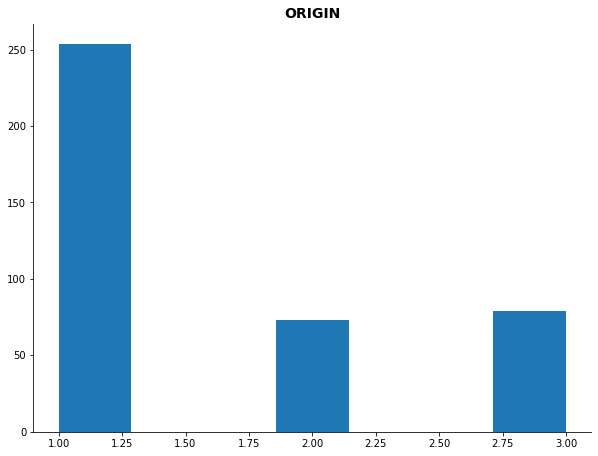

In [17]:
#Vẽ biểu đồ histogram cho mỗi thuộc tính
for x in data.columns[0:8]:
    hist_plot(x)

---
## 5.Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship between the attributes? What is the correlation coefficient between the 2 attributes?

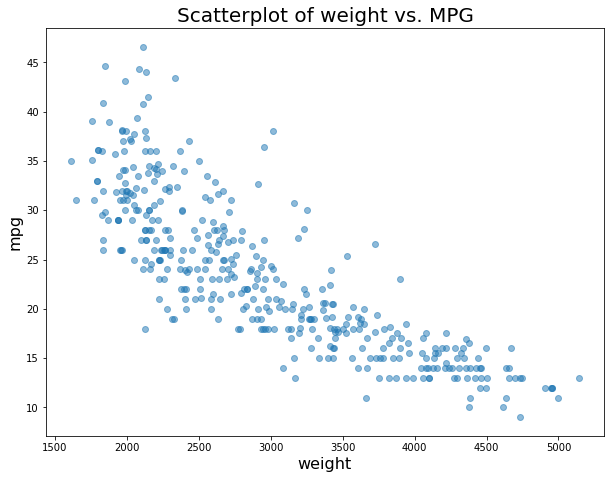

In [18]:
#Vẽ Scatter plot của `weight` vs `MPG` 
plt.figure(figsize=(10, 7.5))
plt.scatter(data.weight,data.mpg,alpha=0.5)
plt.title('Scatterplot of weight vs. MPG', fontsize = 20)
plt.xlabel('weight', fontsize = 16)
plt.ylabel('mpg', fontsize = 16)
plt.show()

In [19]:
data.mpg.corr(data.weight) #Hệ số tương quan giữa 2 thuộc tính

-0.8317409332443354

---
## 6. Plot a scatterplot of year vs. cylinders attributes. Add a small random noise to the values to make the scatterplot look nicer. What can you conclude? Do some internet search about the history of car industry during 70’s that might explain the results.(Hint: data.mpg + np.random.random(len(data.mpg)) will add small random noise)


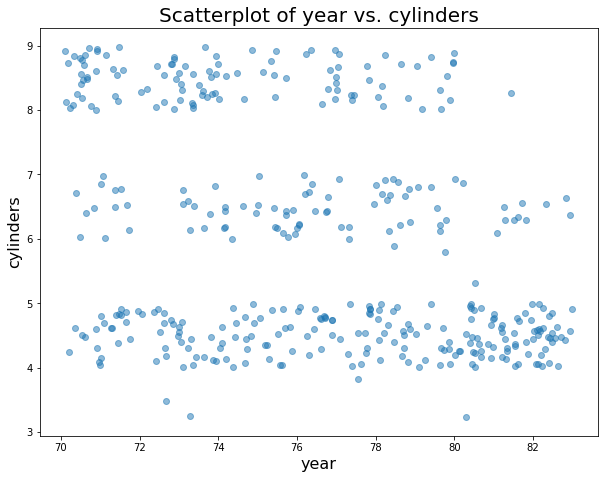

In [20]:
#Vẽ scatter plot cho `year` vs `cylinders`
plt.figure(figsize=(10, 7.5))
plt.scatter(data.model + np.random.random(len(data.model)), data.cylinders + np.random.random(len(data.cylinders)), alpha=0.5)
plt.title('Scatterplot of year vs. cylinders', fontsize = 20)
plt.xlabel('year', fontsize = 16)
plt.ylabel('cylinders', fontsize = 16)
plt.show()

---
## 7. Show 2 more scatterplots that are interesting do you. Discuss what you see.

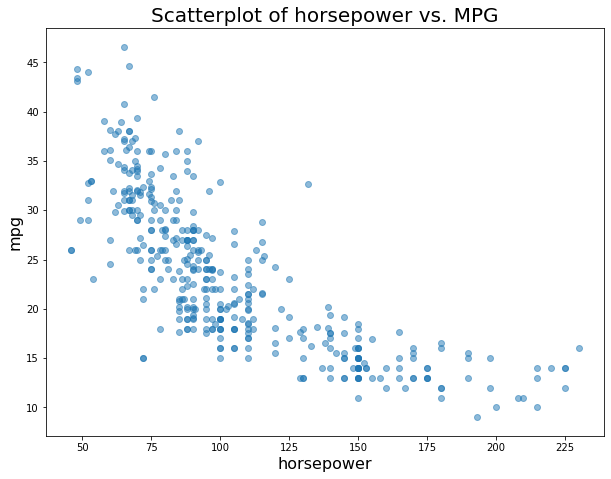

In [21]:
#Vẽ scatter plot cho `horsepower` vs `MPG`
plt.figure(figsize=(10, 7.5))
plt.scatter(data.horsepower,data.mpg,alpha=0.5)
plt.title('Scatterplot of horsepower vs. MPG', fontsize = 20)
plt.xlabel('horsepower', fontsize = 16)
plt.ylabel('mpg', fontsize = 16)
plt.show()

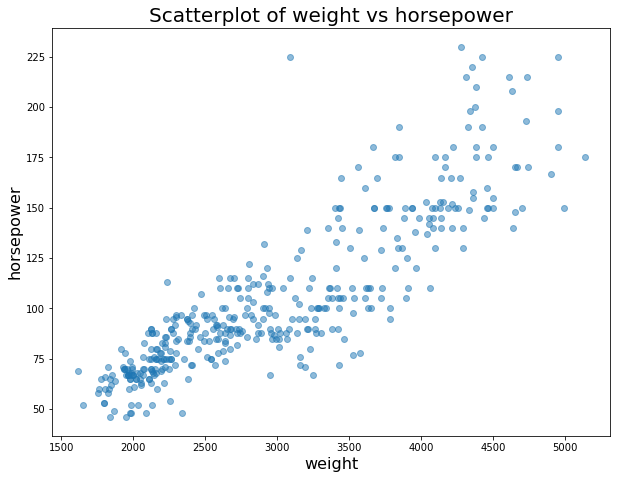

In [22]:
#Vẽ scatter plot cho `weight` vs `horsepower`
plt.figure(figsize=(10, 7.5))
plt.scatter(data.weight,data.horsepower,alpha=0.5)
plt.title('Scatterplot of weight vs horsepower', fontsize = 20)
plt.xlabel('weight', fontsize = 16)
plt.ylabel('horsepower', fontsize = 16)
plt.show()

---
## 8. Plot a time series for all the companies that show how many new cars they introduces during each year. Do you see some interesting trends? (Hint: data.car name.str.split()[0] returns a vector of the first word of car name column.)


In [23]:
#Hàm vẽ biểu đồ biểu diễn số lượng xe của mỗi hãng qua từng năm
def line_plot(x,y,title):
    fig_obj = plt.figure(figsize=(15,7))
    ax = plt.subplot(111)
    
    ax.spines["bottom"].set_visible(True)  # Set the spines, or box bounds visibility
    ax.spines["left"].set_visible(True)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ''' Plot the line of '''
    p = plt.plot(x,y,alpha = 0.5)
    plt.yticks(ticks = [0,1,2,3,4,5,6])
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize = 14)
    plt.ylabel('Number of cars', fontsize = 14)
    plt.show()

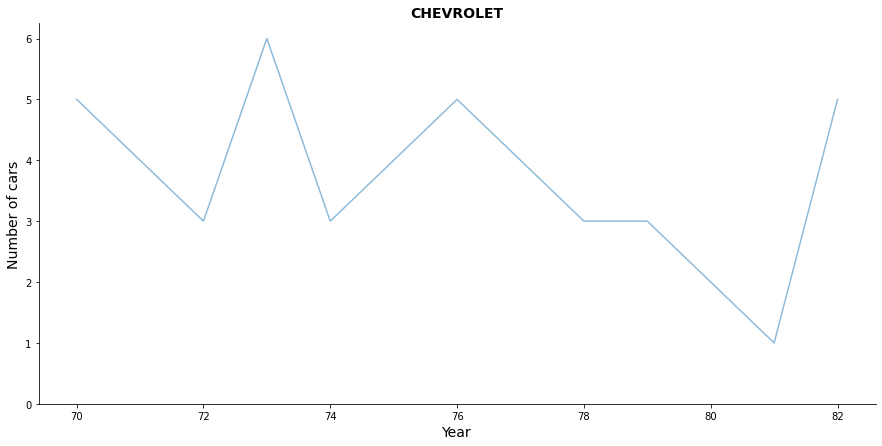

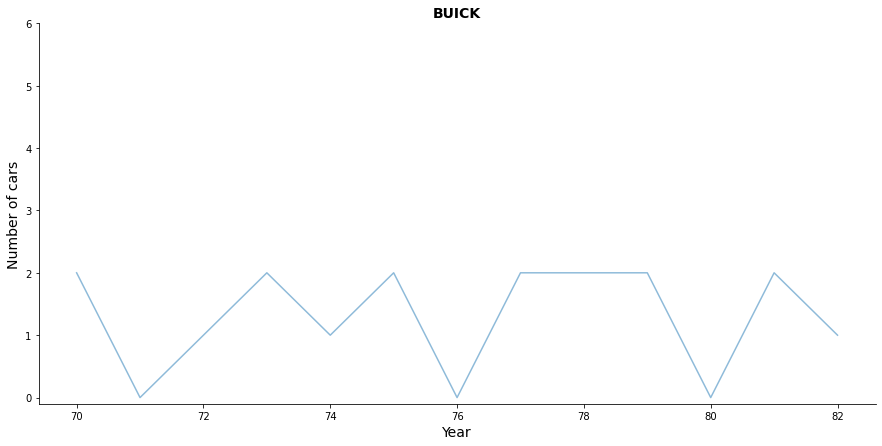

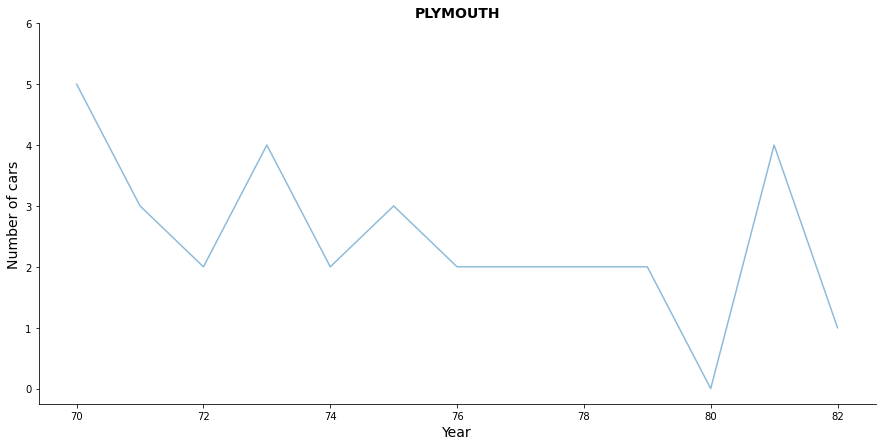

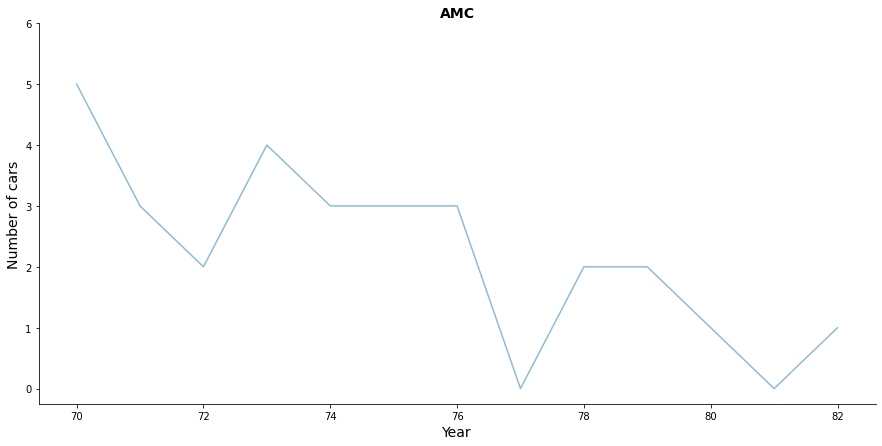

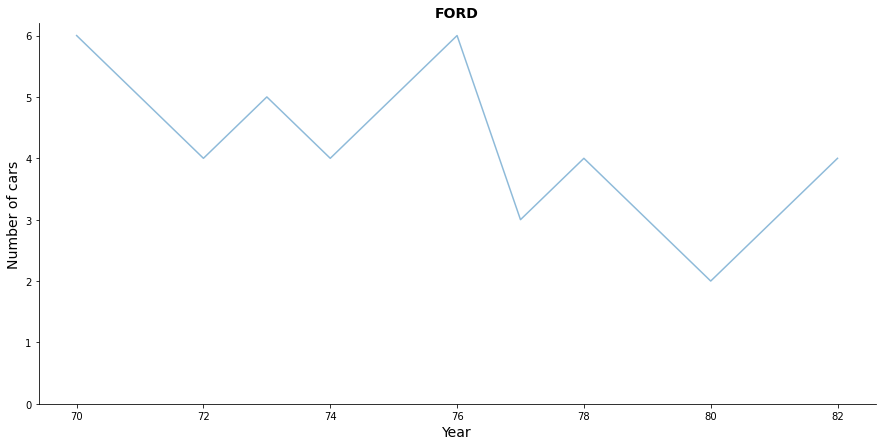

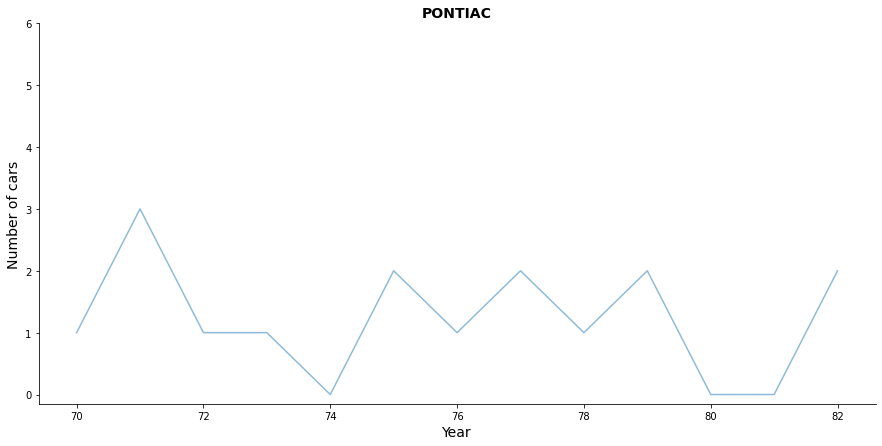

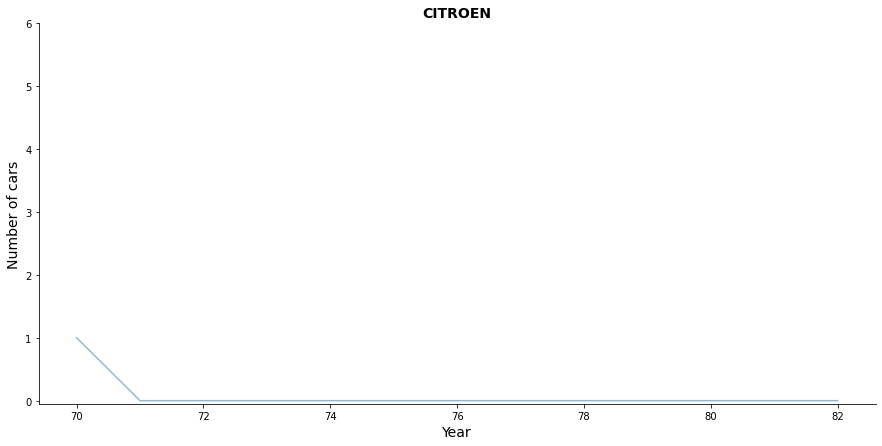

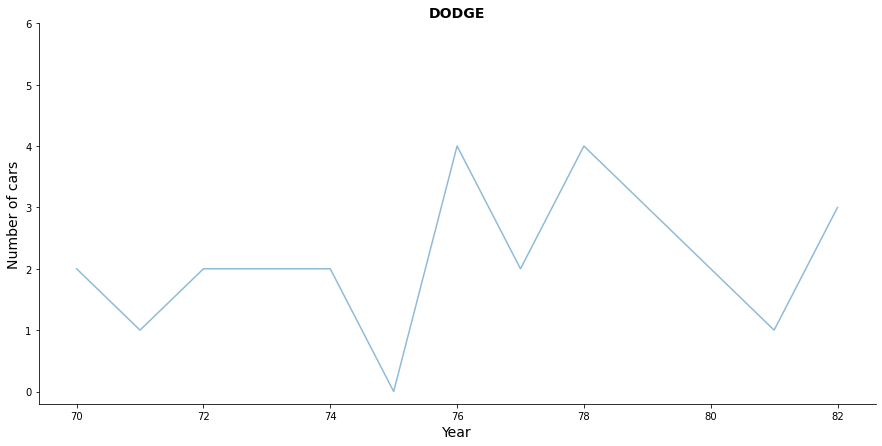

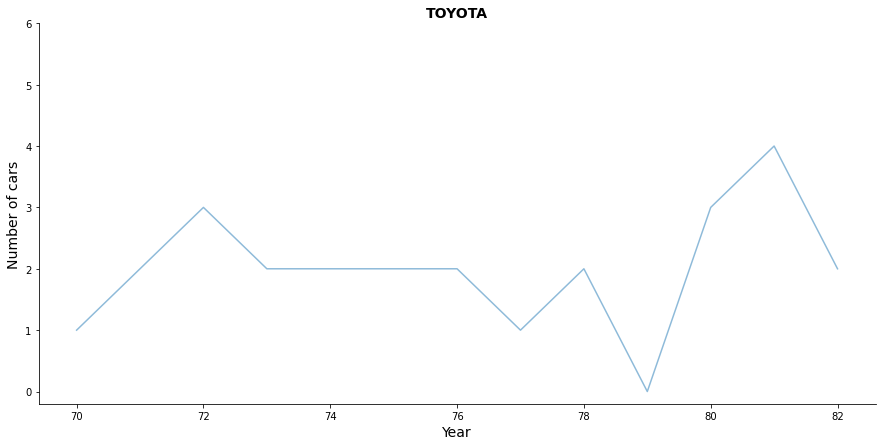

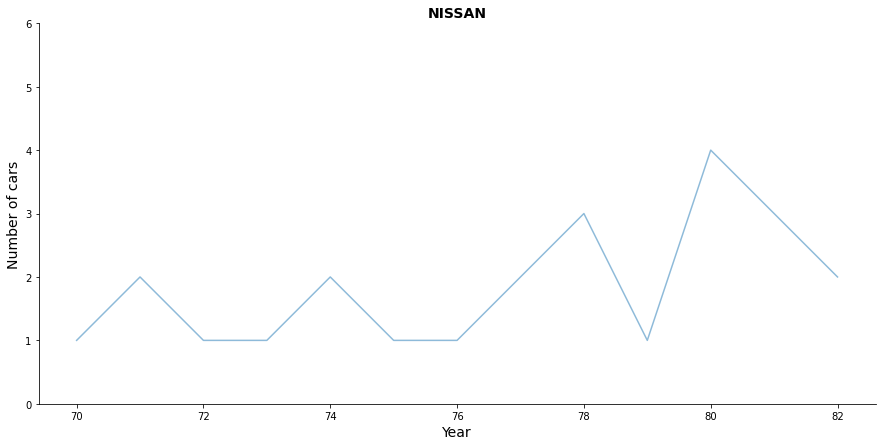

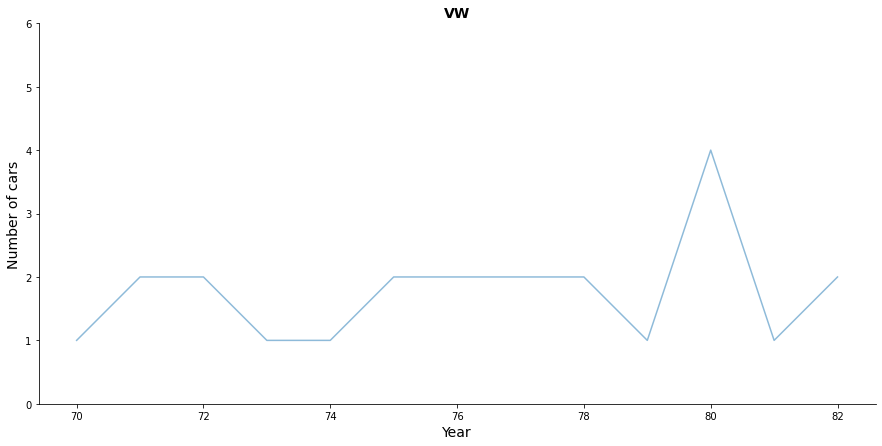

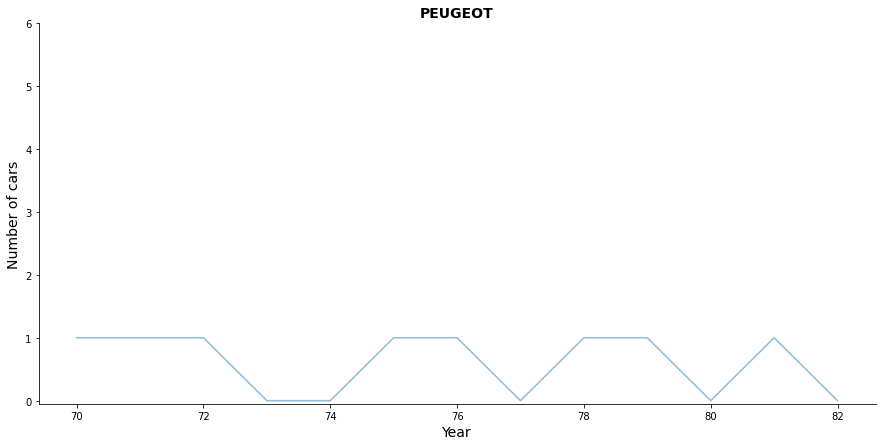

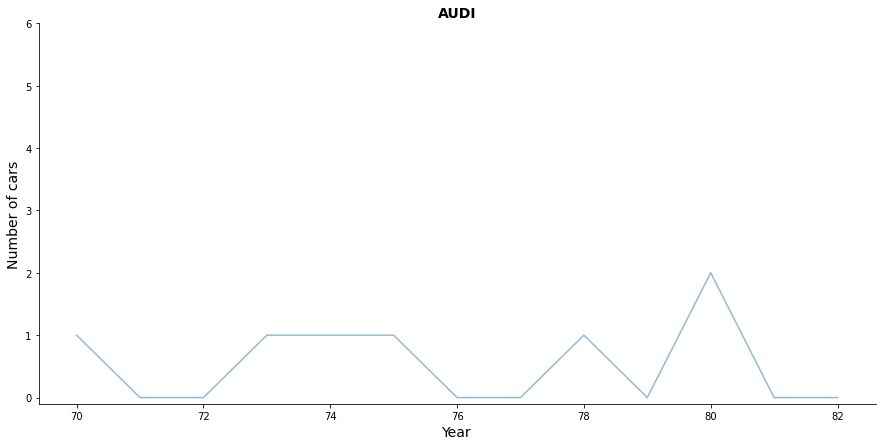

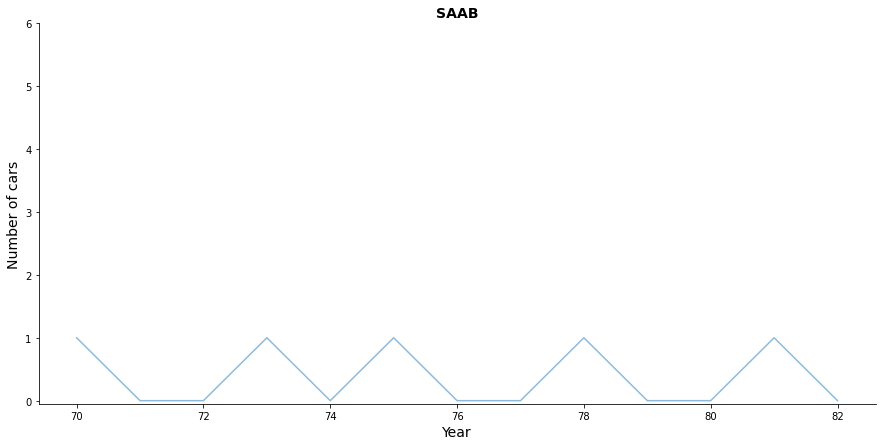

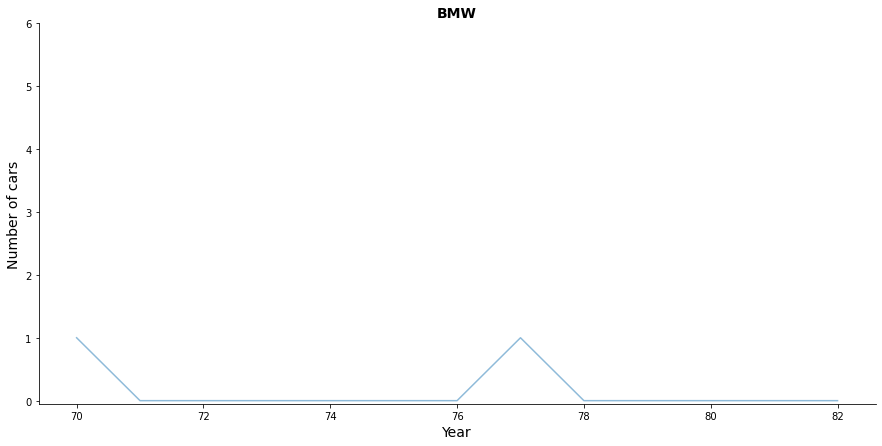

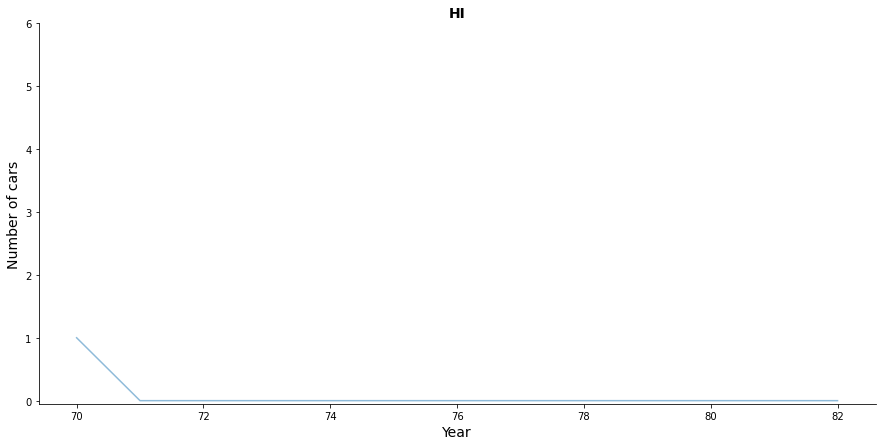

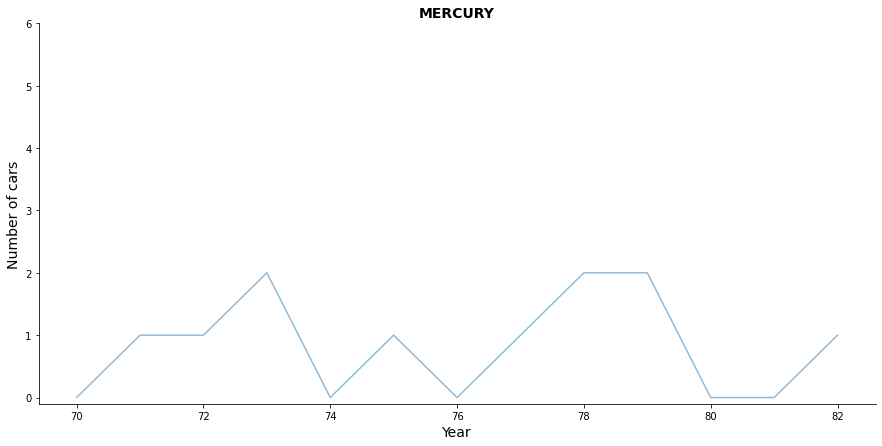

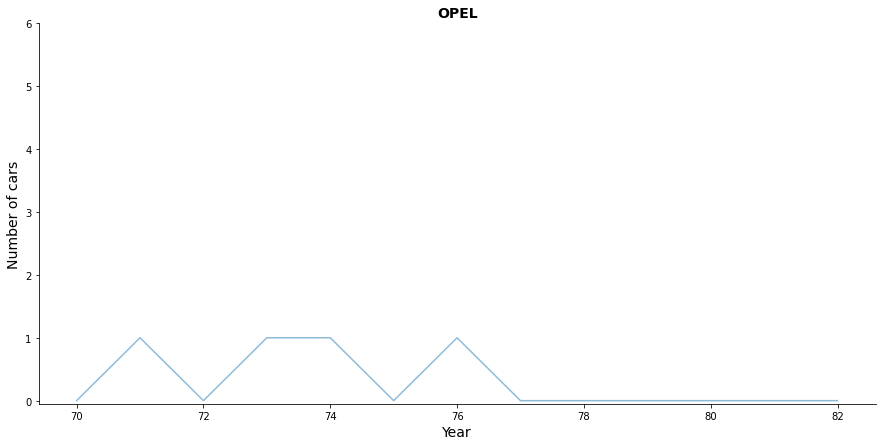

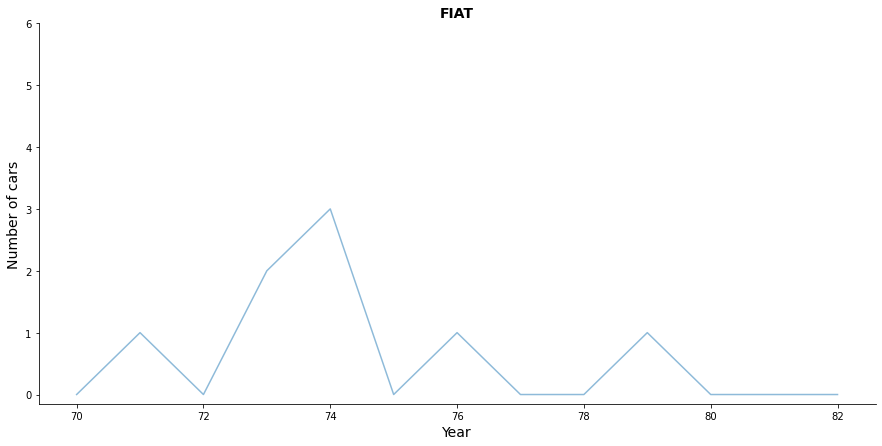

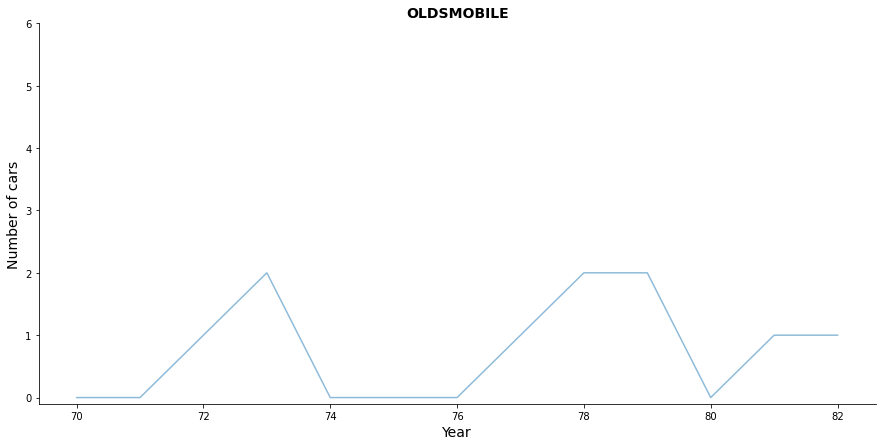

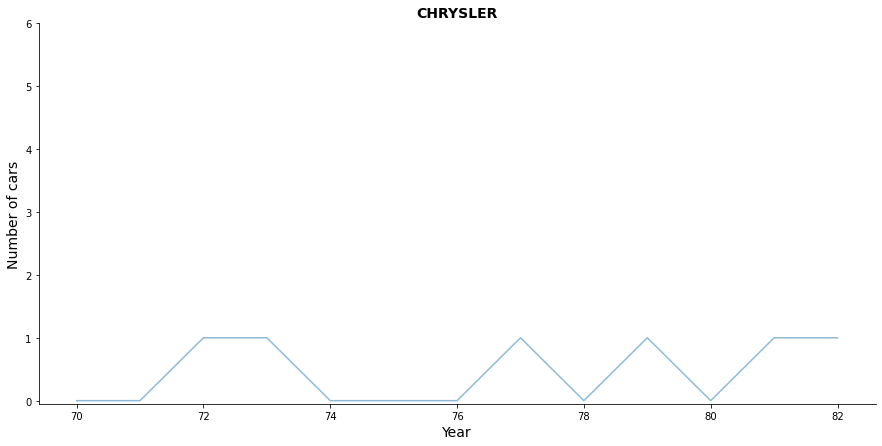

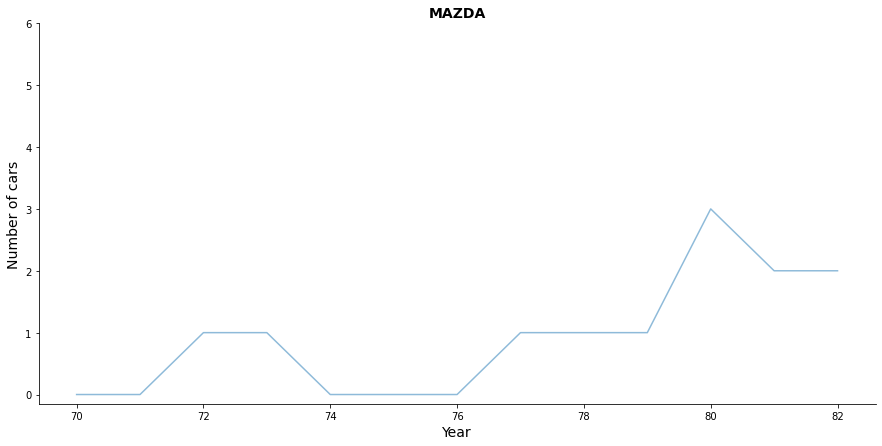

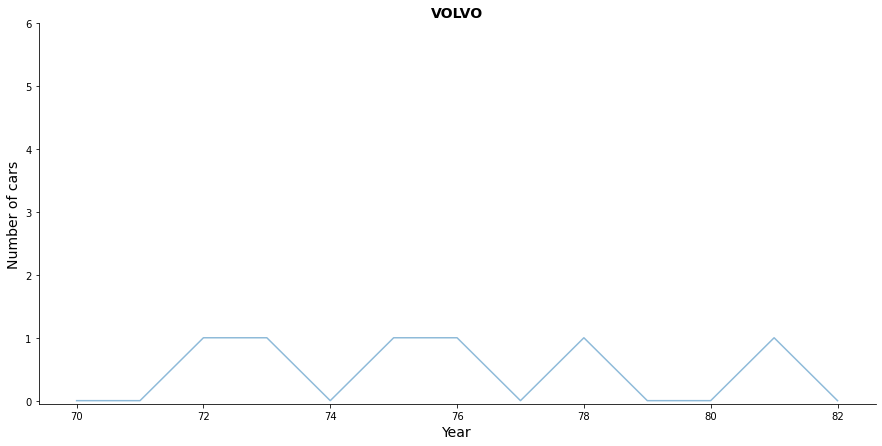

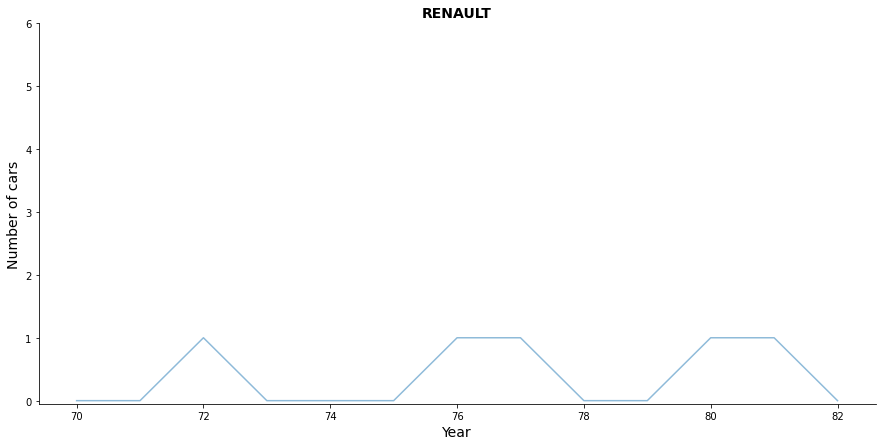

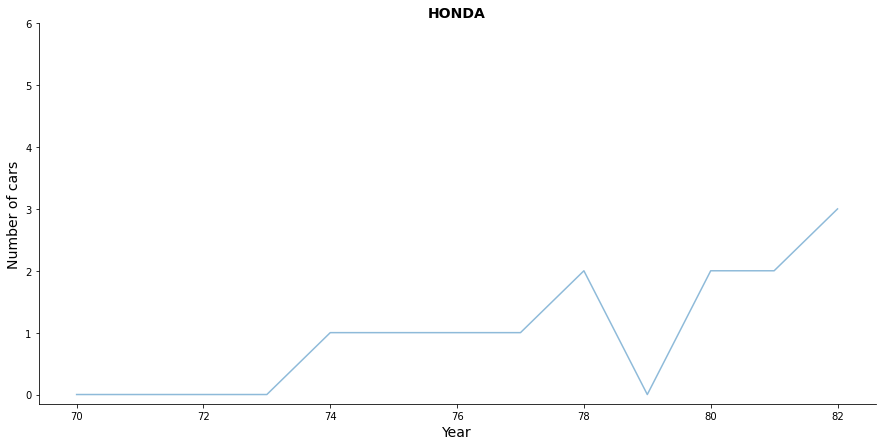

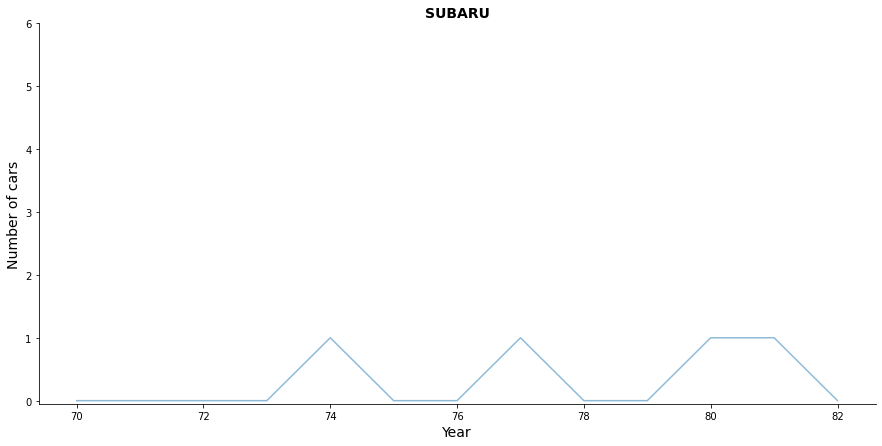

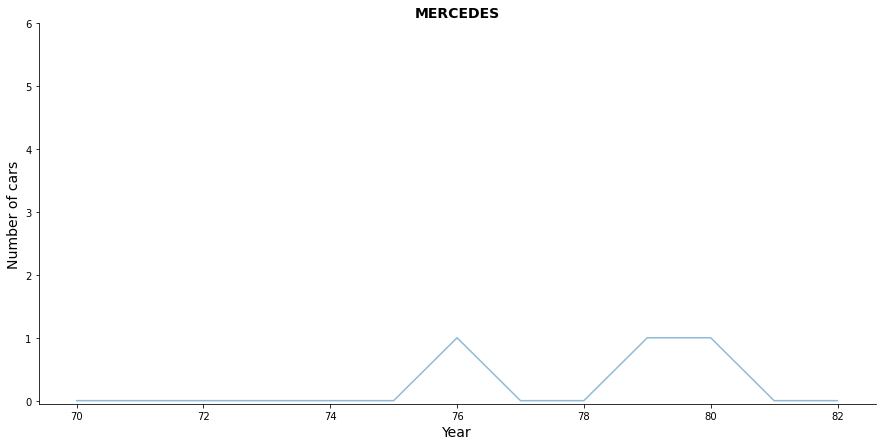

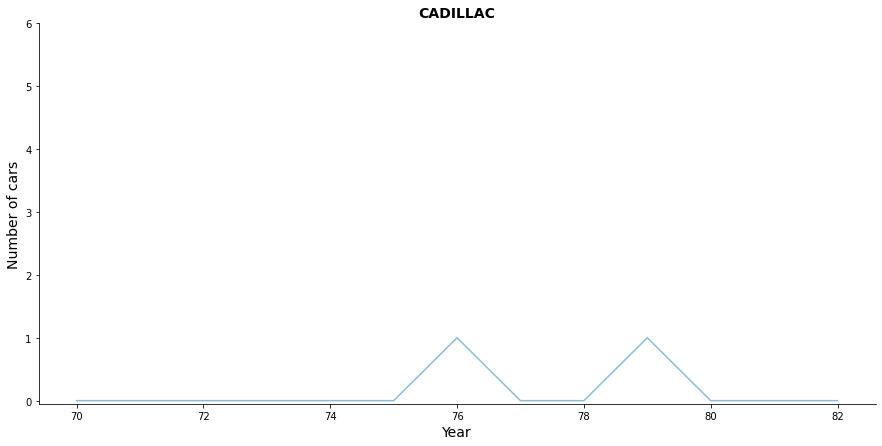

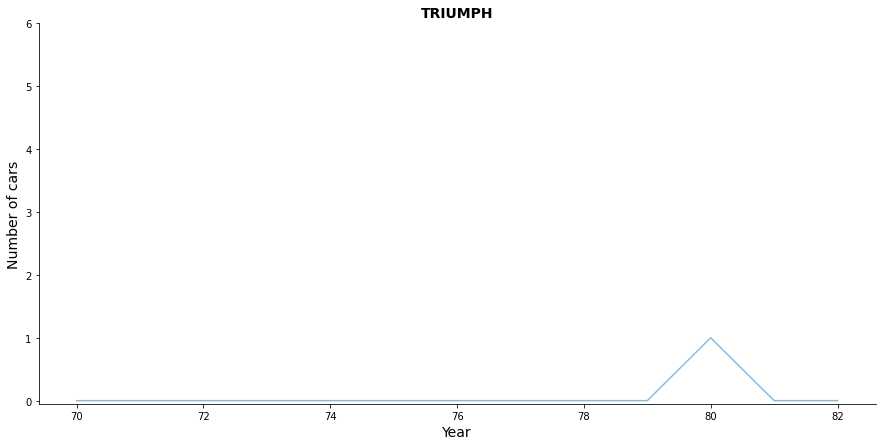

In [24]:
#Vẽ biểu đồ cho từng hãng xe
for company in data.company.unique():
    #Tạo 1 dataframe với 2 cột model và count
    temp = pd.DataFrame()
    temp['model'] = data.model.unique()
    temp['count'] = 0
    
    sen = data[data['company'] == company].groupby(['company', 'model'])['car_name'].count().to_frame('count').reset_index()
    #Với từng hãng xe, năm nào có xe mới thì sẽ cập nhật lại count
    for j in sen.model.unique():
        temp.iloc[temp[temp.model == j].index[0],1]= sen.iloc[sen[sen.model == j].index[0],2]
    #Gọi hàm vẽ
    line_plot(temp['model'], temp['count'], company.upper())

---
## 9.  Calculate the pairwise correlation, and draw the heatmap with Matplotlib. Do you see some interesting correlation? (Hint: data.iloc[:,0:8].corr(), plt.pcolor() draws the heatmap.)

In [25]:
#Tính toán mối tương quan theo từng cặp thuộc tính
data.iloc[:,0:8].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419,-0.460033
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992,0.218845
model,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000,0.187656
origin,0.563450,-0.567478,-0.613056,-0.460033,-0.584109,0.218845,0.187656,1.000000


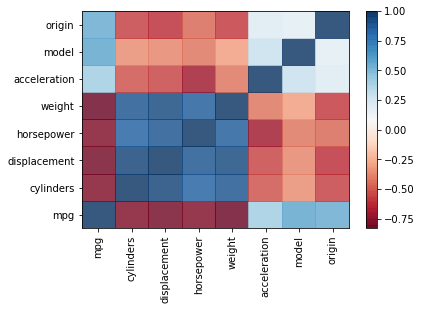

In [26]:
#Vẽ heatmap
fig, ax = plt.subplots()
heatmap = ax.pcolor(data.iloc[:,0:8].corr(), cmap='RdBu', alpha=0.8)
lables = data.columns[0:8]
ax.set_xticks(np.arange(8) + 0.5, minor=False)
ax.set_yticks(np.arange(8) + 0.5, minor=False)
ax.set_xticklabels(lables, minor=False, rotation = 90)
ax.set_yticklabels(lables, minor=False)
plt.colorbar(heatmap)
plt.show()